In [2]:
import json

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
def plot(human_scores, system_scores):

    print(f'Max system score: {max(system_scores)}')
    print(f'Min system score: {min(system_scores)}')

    # Sorting the scores based on the human scores
    combined_scores = list(zip(human_scores, system_scores))
    sorted_scores = sorted(combined_scores, key=lambda x: x[0])
    human_scores, system_scores = zip(*sorted_scores)

    human_scores = np.array(human_scores)
    system_scores = np.array(system_scores)
    means = [np.mean(system_scores[human_scores == i]) for i in range(5)]

    plt.plot([0, 1, 2, 3, 4], means, linestyle='dashed', color='gray')
    plt.scatter(human_scores, system_scores)
    plt.xlabel('Human Scores')
    plt.ylabel('System Scores')

    plt.show()

Max system score: 0.26666666666666666
Min system score: -0.18181818181818182


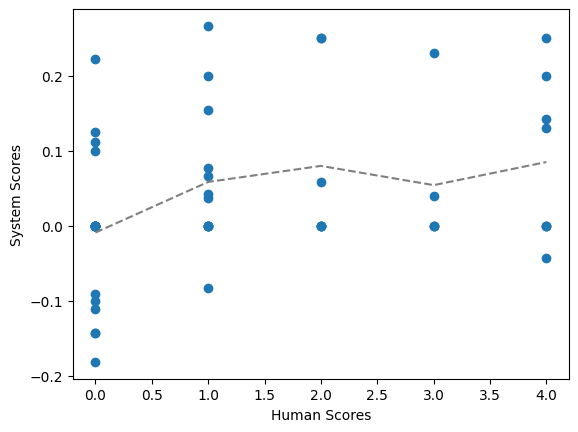

In [7]:
json_file = open('../results.json', 'r')
json_data = json.load(json_file)
fa_human_scores = pd.read_csv("../datasets/en_fa_56_with_scores.csv")["Score"]

fa_blanc_scores = json_data["BLANC_help_en_fa_translation"][:56]

plot(fa_human_scores, fa_blanc_scores)

[0.06344653564309642, 0.11238755044122524, 0.1416554354540961, 0.16737870180355707, 0.13100718201293649]


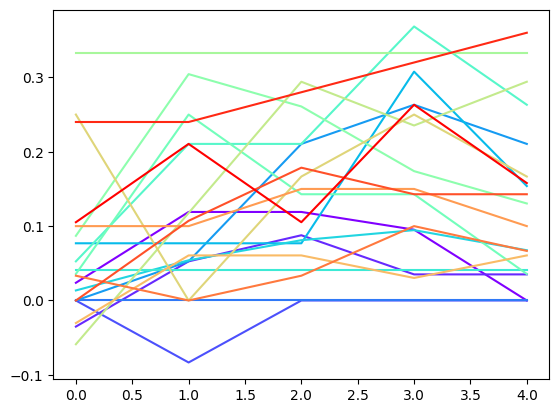

In [8]:
fr_blanc_scores = json_data["BLANC_help_en_fr_translation"]

mean = [0, 0, 0, 0, 0]
for i in range(20):
    for j in range(5):
       mean[4-j] += 1/20 * fr_blanc_scores[i*5+j] 
[i*5+j] 
print(mean)

x = [(-i+4)%5 for i in range(100)]
colors = cm.rainbow(np.linspace(0, 1, 20))
for i in range(20):
    plt.plot(x[i*5:(i+1)*5], fr_blanc_scores[i*5:(i+1)*5], color = colors[i])
plt.show()